# Linear classification
- The goal of this exercise is to study hard and soft binary linear classification.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__Hard linear classification: perceptron algorithm__
- Linearly separable data
-We start by generating a binary linear classification dataset with 100 examples (50 in each class).

In [3]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    
    X = rng.uniform(0.0, 1.0, (n_samples, 2))
    
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples)])
    
    return X, t

X, t = create_dataset(100)

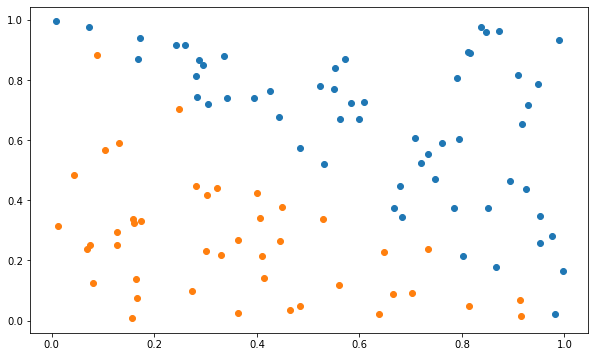

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

Implement the algorithm based on the linear regression algorithm. The only difference is that the weight vector is now a vector… You will need to use np.dot. __Make a plot of the mse during training.__

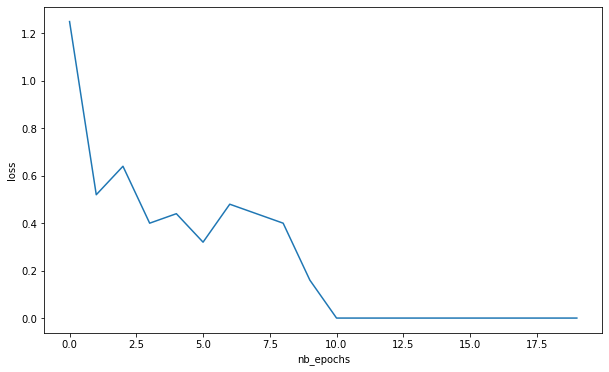

In [11]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
losses = []

for epoch in range(nb_epochs):
    loss = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        # Update the bias
        b += eta * (t[i] - y_i) 
        # Loss mse
        loss += (t[i] - y_i)**2
        
    # Append 
    losses.append(loss/N)
    
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("nb_epochs")
plt.ylabel("loss")
plt.show()

Visualize the hyperplane.
- w0x0 + w1x1 + b = 0  => x1 = -(w0x0 + b)/w1
- You just need to draw a line between the two extremities of the hyperplane, for example between 0 and 1 or between X[:, 0].min() and X[:, 0].max().

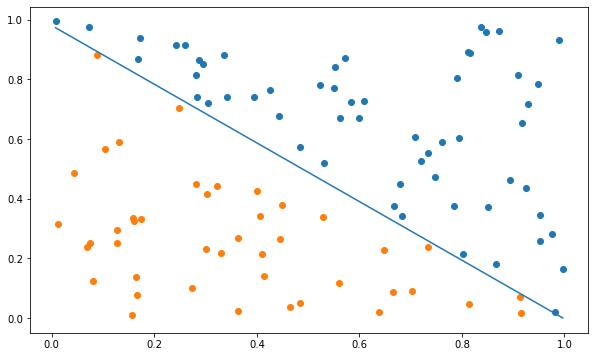

In [12]:
plt.figure(figsize=(10, 6)) 

# Data
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])

# Model
x_min, x_max = X[:, 0].min(), X[:, 0].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])

 Modify your algorithm to compute the training error and the mse loss for each epoch. 

Error: 0.0


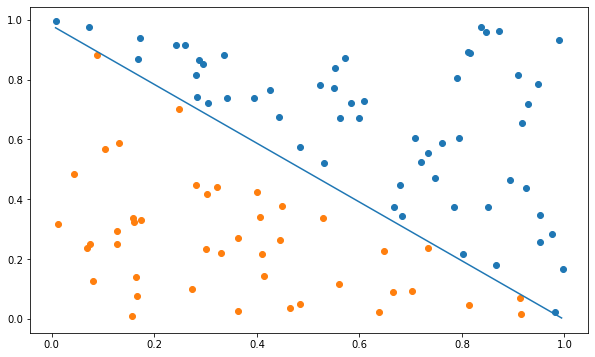

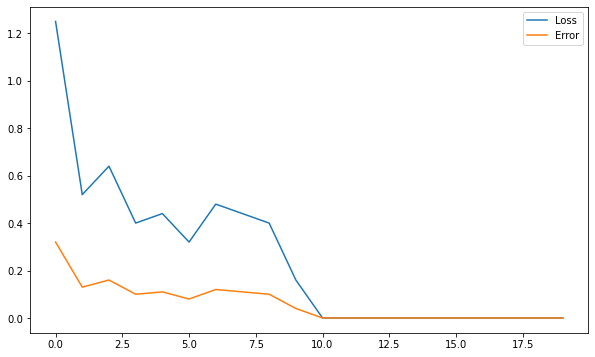

In [13]:
# Parameters
eta = 0.01
nb_epochs = 20
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :]
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)
    
print("Error:", error/N)  

plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

The training error and the loss vary together, by definition. The scale of the loss is somewhat arbitrary, while the error corresponds to what we want. If you have to choose, visualize the error.

# Non-linearly separable data
- Let’s now see what happens when you apply your algorithm on a non-linearly separable dataset. It is basically the same method as before, except that we add one outlier at the end.

In [14]:
def create_dataset(n_samples):
    
    rng = np.random.default_rng()
    X = rng.uniform(0.0, 1.0, (n_samples-1, 2))
    t = np.array([1 if X[i, 0] + X[i, 1] > 1. else -1 for i in range(n_samples-1)])
    
    # Outlier
    X = np.append(X, np.array([0.1, 0.1]).reshape((1, 2)), axis=0)
    t = np.append(t, [1])
    return X, t

X, t = create_dataset(100)

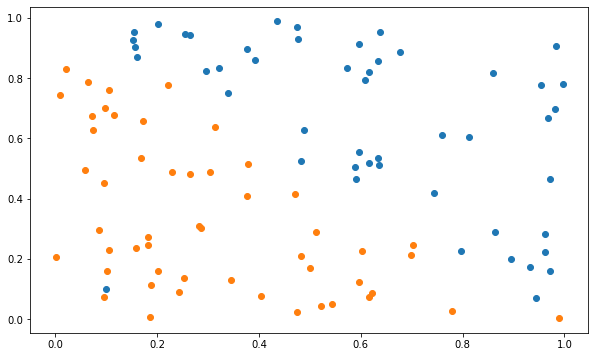

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
plt.show()

Final error: 0.37


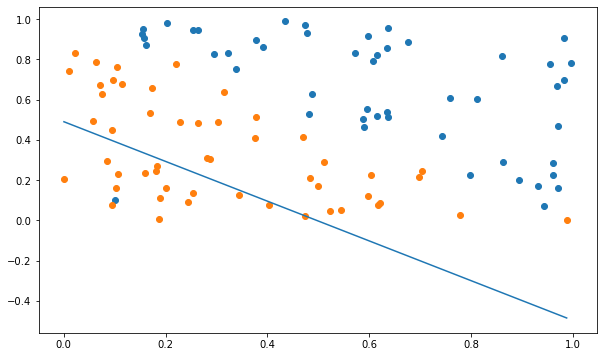

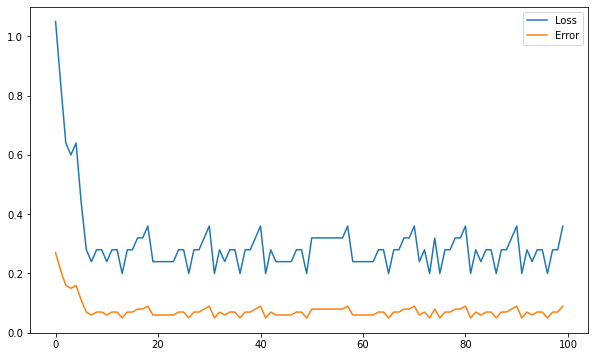

In [16]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Prediction
        y_i = np.sign(np.dot(w, X[i, :]) + b)
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != y_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

error = 0
for i in range(N):
    y_i = np.sign(np.dot(w, X[i, :]) + b)
    if t[i] != y_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==-1, 0], X[t==-1, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

the outlier heavily attracts the hyperplane and changing the hyperparameters does not improve the situation. That’s bad.

# Soft linear classification: logistic regression

Let’s now see whether logistic regression helps us with outliers. The following cell implements the logistic function:

In [17]:
def logistic(x):
    return 1. / (1 + np.exp(-x))

Targets  should be 0 and 1 in the logistic regression algorithm, while they are -1 and 1 in the current vector

In [18]:
t[t==-1] = 0

Final error: 0.05


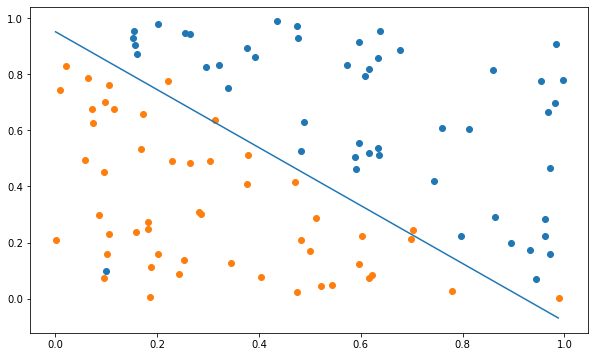

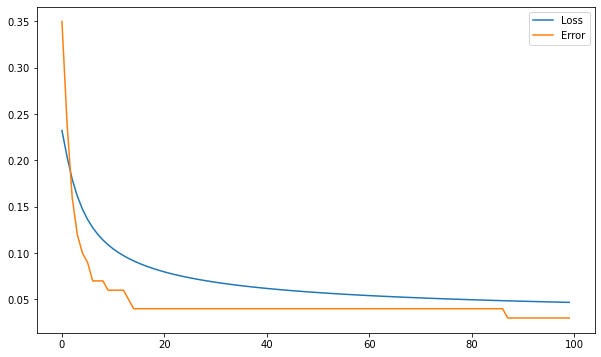

In [19]:
# Parameters
eta = 0.1
nb_epochs = 100
N = len(t)

# Initialize the weight vector and bias
w = np.zeros(2)
b = 0.

# Perceptron algorithm
errors = []
losses = []
for epoch in range(nb_epochs):
    loss = 0
    error = 0
    
    # Iterate over all training examples
    for i in range(N):
        # Probability
        y_i = logistic(np.dot(w, X[i, :]) + b)
        
        # Predicted class
        c_i = 1.0 if y_i > 0.5 else 0.0
        
        # Update the weight
        w += eta * (t[i] - y_i) * X[i, :] 
        
        # Update the bias
        b += eta * (t[i] - y_i) 
        
        # Loss mse
        loss += (t[i] - y_i)**2
        
        # Count misclassifications
        if t[i] != c_i :
            error += 1
        
    # Append 
    losses.append(loss/N)
    errors.append(error/N)

error = 0
for i in range(N):
    y_i = logistic(np.dot(w, X[i, :]) + b)
    c_i = 1.0 if y_i > 0.5 else 0.0
    if t[i] != c_i :
        error += 1
print("Final error:", error/N)    
    
plt.figure(figsize=(10, 6)) 
plt.scatter(X[t==1, 0], X[t==1, 1])
plt.scatter(X[t==0, 0], X[t==0, 1])
x_min, x_max = X[:, 0].min(), X[:, 1].max()
plt.plot([x_min, x_max], [-(x_min*w[0] + b)/w[1], -(x_max*w[0] + b)/w[1]])
    
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.plot(errors, label="Error")
plt.legend()
plt.show()

As logistic regression does not use “hard” boundaries like the perceptron, but soft ones, it is much more robust to outliers. As we have in addition the confidence score, the conclusion is that one should never use the perceptron algorithm but logistic regression for binary classification.